In [227]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

In [228]:
# Read data from CSV
housing_dataset = pd.read_csv('housing.csv')

In [229]:
#Check data by seeing the first 5 rows
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [230]:
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [231]:
 ### info on the kind of data-type and
 ## features present in the dataframe
 housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [232]:
#Dropping null values
## since the amount of missing data is pretty small compared to the entire dataset we just drop the missing records all together
housing_dataset.dropna(inplace = True)
print(housing_dataset.shape)

(20433, 10)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

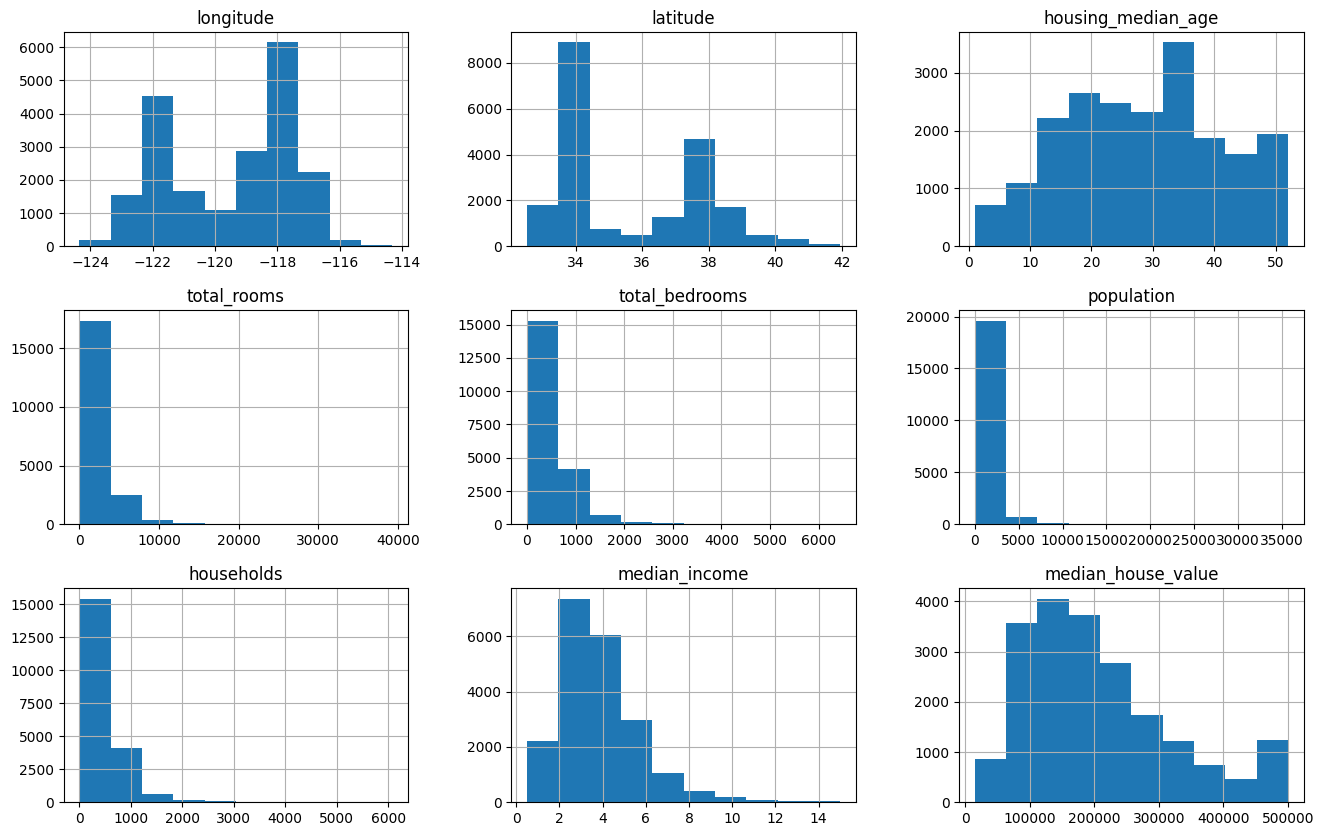

In [233]:
housing_dataset.hist(figsize=(16,10))

In [234]:
# Being the categorical paramter we would like to find out
# the different values present in the dataset
housing_dataset['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [235]:
#creating a feature for all this
pd.get_dummies (housing_dataset.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [236]:
housing_dataset = pd.get_dummies(housing_dataset, columns=['ocean_proximity'], prefix='ocean')


<Axes: >

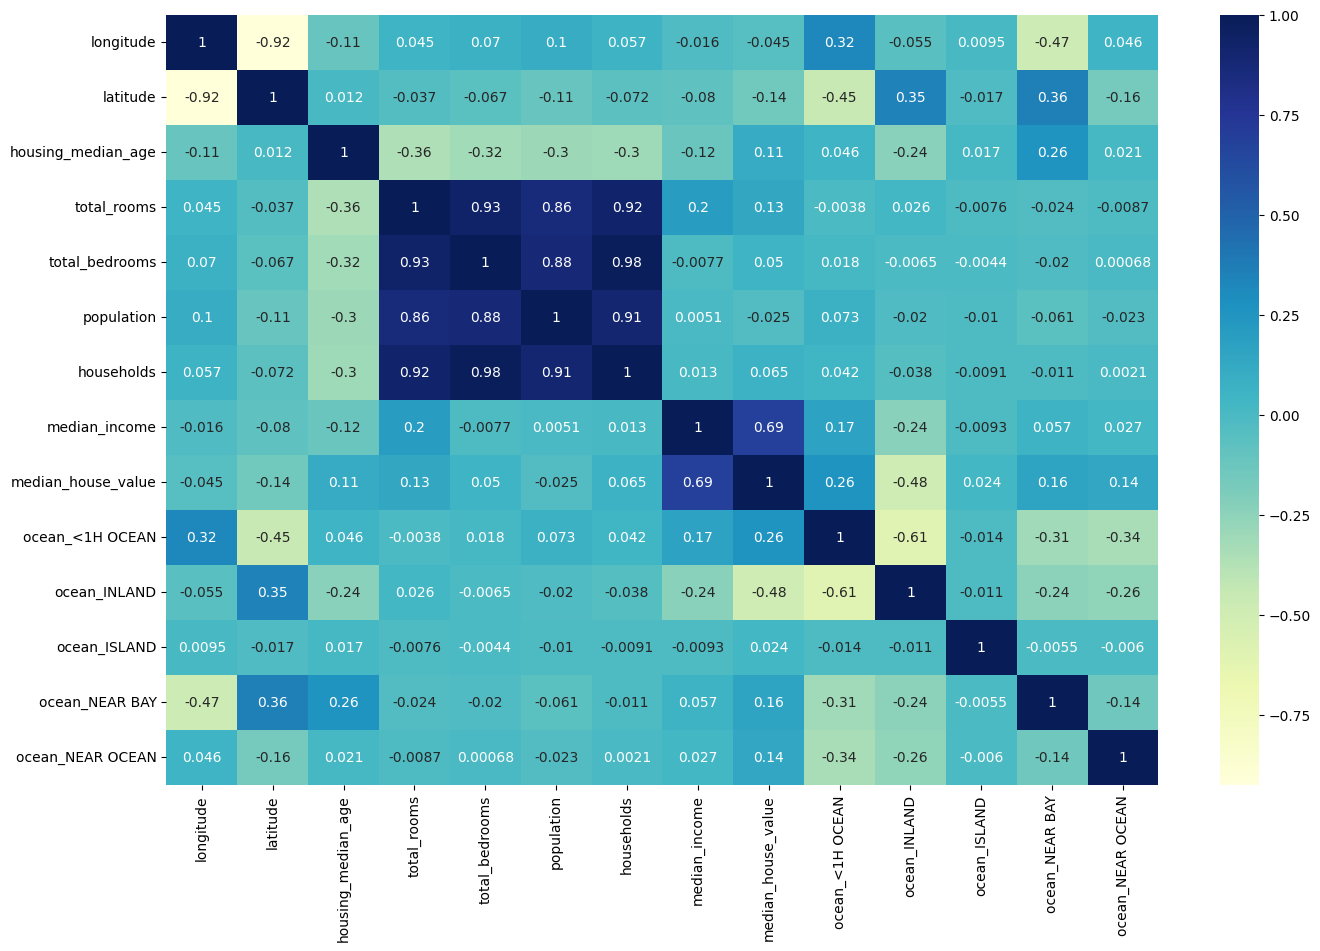

In [237]:

plt.figure(figsize = (16,10))
sns.heatmap(housing_dataset.corr(), annot = True,cmap="YlGnBu")

In [238]:
housing_dataset.head()
housing_dataset.shape

(20433, 14)

In [239]:
# In roder prevent ordering bias and promote randomization, we have to randomize the dataset
housing_pd_shuffled = housing_dataset.sample(n=len(housing_dataset), random_state=1)
 ## random_state ensures that a particular order is maintained
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_<1H OCEAN,ocean_INLAND,ocean_ISLAND,ocean_NEAR BAY,ocean_NEAR OCEAN
6715,-118.18,34.14,38.0,3039.0,487.0,1131.0,465.0,7.7116,360900.0,1,0,0,0,0
4121,-118.19,34.14,38.0,1826.0,300.0,793.0,297.0,5.2962,291500.0,1,0,0,0,0
15433,-117.25,33.20,10.0,2050.0,473.0,1302.0,471.0,2.7961,131300.0,1,0,0,0,0
20272,-119.23,34.19,16.0,5297.0,810.0,1489.0,667.0,6.4522,500001.0,0,0,0,0,1
11843,-120.93,39.96,15.0,1666.0,351.0,816.0,316.0,2.9559,118800.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,190300.0,1,0,0,0,0
17455,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,125800.0,0,0,0,0,1
5249,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,500001.0,1,0,0,0,0
12290,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,91200.0,0,1,0,0,0


In [240]:

final_dataset = housing_pd_shuffled


In [241]:
## splitting the entire dataset 80% of the data is used for testing, 10% is used for testing and 10% will be used for validation
train_pd, test_pd, val_pd = final_dataset[:16000], final_dataset[16000:18000], final_dataset[18000:]
len(train_pd), len(test_pd), len(val_pd)



(16000, 2000, 2433)

In [242]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((16000, 13), (16000,), (2433, 13), (2433,), (2000, 13), (2000,))

After we are done with the splitting of the entire dataset into train, test and split we as a part of data pre-processing step we have to standardize the data points especially in some features more than the others as:-


*   Numerical Stability
*   Uniform Learning rates
*   Gradient Descent Optimization
*   Improved regularization





In [243]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)
## We have to mask the ouput data in the case of test and validation data

In [244]:
print(X_train.shape, X_val.shape, X_test.shape)

(16000, 13) (2433, 13) (2000, 13)


IMPLEMENTING THE MOST BASIC REGRESSION MODEL OF LINEAR REGRESSION

In [245]:

lm = LinearRegression().fit(X_train, y_train)
print("The training error is:  ",mse(lm.predict(X_train), y_train, squared=False))
print("The validation error is: ", mse(lm.predict(X_val), y_val, squared=False))

The training error is:   5.438354208306605e-15
The validation error is:  5.354374623500539e-15


In [246]:
regression_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
regression_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [247]:
y_pred = regression_pipeline.predict(X_test)
r2_score( y_test, y_pred)

1.0

### After we are done with the simlest technique we move to a rather rarely used KNeighborsRegressor technique and try to find out the kind of error it gives

In [248]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)


(0.2948908696450265, 0.3347892577463363)

In [249]:
y_pred = knn.predict(X_test)
r2_score( y_test, y_pred)

0.05266095406940463

## Now we move on to the more enriched and improved Ensemble learning technique

In [250]:
from sklearn.ensemble import RandomForestRegressor
#Randomn Forest Regressor
rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

(0.003299621190379284, 0.005833700299654576)

In [251]:
y_pred = rfr.predict(X_test)
r2_score( y_test, y_pred)

0.999712728585968

In [252]:
from sklearn.ensemble import GradientBoostingRegressor
#GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)

(0.006367454717722052, 0.006943859433947519)

In [253]:
y_pred = gbr.predict(X_test)
r2_score( y_test, y_pred)

0.9995501538936769

As we can see with the use of Ensemble learning techniques the Mean Squared error has significantly come down and had a positive impact on the model buidling